In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans

/usr/lib/python2.7/dist-packages/matplotlib/__init__.py:874: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
img = cv2.imread('./background3.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (200,100))
img.shape

(100, 200, 3)

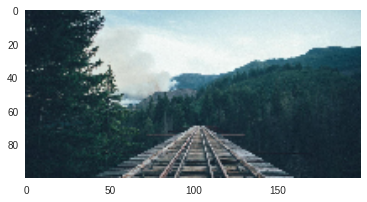

In [3]:
plt.figure(0)
plt.grid('off')
plt.imshow(img)
plt.show()

In [4]:
data = img.reshape((-1, 3))
data.shape

(20000, 3)

In [5]:
km = KMeans(n_clusters=4)

In [6]:
km.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [7]:
labels = km.predict(data)

In [8]:
print km.cluster_centers_

[[ 212.73151408  228.86989437  230.25316901]
 [  24.35021135   46.07059987   54.00035974]
 [  63.87465181   91.33844011   98.37929434]
 [ 137.1747851   146.38681948  150.02483286]]


In [9]:
print labels.max()

3


In [10]:
new_pix = np.zeros_like(data)

for ix in range(new_pix.shape[0]):
    new_pix[ix, :] = km.cluster_centers_[labels[ix]].astype(np.uint8)

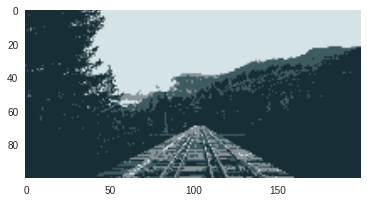

In [11]:
plt.figure(1)
plt.grid('off')
plt.imshow(new_pix.reshape(img.shape))

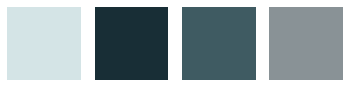

In [12]:
colors = km.cluster_centers_.astype(np.uint8)


for ix in range(colors.shape[0]):
    plt.subplot(1, colors.shape[0], ix+1)
    plt.grid("off")
    plt.xticks([])
    plt.yticks([])
    col = np.ones((100, 100, 3), dtype=np.uint8)
    col[:, :, :] = colors[ix]
    plt.imshow(col)

# Decision Tree

In [49]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [52]:
ds = pd.read_csv("titanic.csv")
ds.shape
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [53]:
ds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [61]:
cols_to_drop = [
    'PassengerId',
    'Name',
    'Ticket',
    'Cabin',
    'Embarked',
]
df = ds.drop(cols_to_drop, axis = 1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22,1,0,7.2500
1,1,1,female,38,1,0,71.2833
2,1,3,female,26,0,0,7.9250
3,1,1,female,35,1,0,53.1000
4,0,3,male,35,0,0,8.0500


In [63]:
def con_sex_to_num(s):
    if s=='male':
        return 0
    elif s=='female':
        return 1
    else:
        return s
df.Sex = df.Sex.map(con_sex_to_num)
df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22,1,0,7.2500
1,1,1,1,38,1,0,71.2833
2,1,3,1,26,0,0,7.9250
3,1,1,1,35,1,0,53.1000
4,0,3,0,35,0,0,8.0500


In [64]:
data = df.dropna()

In [65]:
data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,0.365546,29.699118,0.512605,0.431373,34.694514
std,0.491460,0.838250,0.481921,14.526497,0.929783,0.853289,52.918930
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,20.125000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,0.000000,28.000000,0.000000,0.000000,15.741700
75%,1.000000,3.000000,1.000000,38.000000,1.000000,1.000000,33.375000
max,1.000000,3.000000,1.000000,80.000000,5.000000,6.000000,512.329200


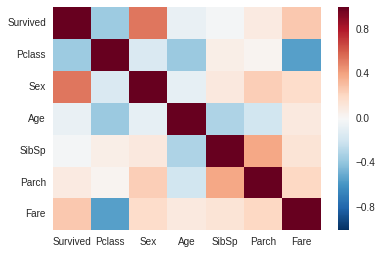

In [66]:
plt.figure(0)
sns.heatmap(data.corr())

In [81]:
#take input and output in x and y respectively

input_cols = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
output_cols = ['Survived']

X = data[input_cols]
Y = data[output_cols]
print X.shape, Y.shape

(714, 6) (714, 1)


In [70]:
data = data.reset_index(drop=True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22,1,0,7.2500
1,1,1,1,38,1,0,71.2833
2,1,3,1,26,0,0,7.9250
3,1,1,1,35,1,0,53.1000
4,0,3,0,35,0,0,8.0500


In [82]:
data.loc[2]

Survived     1.000
Pclass       3.000
Sex          1.000
Age         26.000
SibSp        0.000
Parch        0.000
Fare         7.925
Name: 2, dtype: float64

# Functions for Decision Tree

In [73]:
import sklearn

In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [83]:
split = int(0.8*data.shape[0])

In [84]:
dt = DecisionTreeClassifier()

In [85]:
dt.fit(X[:split], Y[:split])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [86]:
dt.score(X[split:], Y[split:])

0.77622377622377625

In [87]:
rf = RandomForestClassifier()

In [88]:
rf.fit(X[:split], Y[:split])

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [89]:
rf.score(X[split:], Y[split:])

0.85314685314685312

In [90]:
#splitting training and testing data

training_data = data[:split]
testing_data = data[split:]

In [132]:
def divide_data(x_data, fkey, fval):
    x_right = pd.DataFrame([], columns=x_data.columns)
    x_left = pd.DataFrame([], columns=x_data.columns)
    
    
    for ix in xrange(x_data.shape[0]):
        # Retrieve the current value for the fkey column
        val = x_data[fkey].loc[ix]
        
        # Check where the row needs to go
        if val > fval:
            # pass the row to right
            x_right = x_right.append(x_data.loc[ix])
        else:
            # pass the row to left
            x_left = x_left.append(x_data.loc[ix])
    
    # return the divided datasets
    return x_left, x_right

def entropy(col):    
    counts = np.unique(col, return_counts=True)
    N = float(col.shape[0])
    
    ent = 0.0
    
    for ix in range(counts[1].shape[0]):
        f = counts[1][ix] / N
        ent += (-1.0 * f * np.log2(f))
    return ent

def information_gain(xdata, fkey, fval):
    left, right = divide_data(xdata, fkey, fval)
    P = float(left.shape[0])/xdata.shape[0]
    Q = float(right.shape[0])/xdata.shape[0]
    
    if left.shape[0] == 0 or right.shape[0] == 0:
        return -10000
    
    return entropy(xdata.Survived) - (P*entropy(left.Survived) + Q*entropy(right.Survived))


In [133]:
class DecisionTree():
    def __init__(self, depth=0, max_depth = 5):
        self.left = None
        self.right = None
        self.fval = None
        self.fkey = None
        self.max_depth = max_depth
        self.depth = depth
        self.target = None
    
    def train(self, X_train):
        print self.depth, '-'*10
        features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
        gains = []
        for fx in features:
            gains.append(information_gain(X_train, fx, X_train[fx].mean()))
        
        self.fkey = features[np.argmax(gains)]
        self.fval = X_train[self.fkey].mean()
        
        #dividing the dataset
        data_right, data_left = divide_data(X_train, self.fkey, self.fval)
        data_right = data_right.reset_index(drop=True)
        data_left = data_left.reset_index(drop=True)
        
        
        #check the shapes
        if data_left.shape[0] == 0 or data_right.shape[0] == 0:
            if X_train.Survived.mean() >= 0.5:
                self.target = 'Survived'
            else:
                self.target = 'Dead'
            return
        
        if self.depth >= self.max_depth:
            if X_train.Survived.mean() >= 0.5:
                self.target = 'Survived'
            else:
                self.target = 'Dead'
            return
        
        #branch to left
        self.right = DecisionTree(depth = self.depth+1, max_depth=self.max_depth)
        self.right.train(data_right)
        
        self.left = DecisionTree(depth = self.depth+1, max_depth=self.max_depth)
        self.left.train(data_left)
        
        if X_train.Survived.mean() > 0.5:
            self.target ='Survived'
        else:
            self.target ='Dead'
        return
    
    
    def predict(self, test):
        if test[self.fkey] > self.fval:
            if self.right is None:
                return self.target
            return self.right.predict(test)
        else:
            if self.left is None:
                return self.target
            return self.left.predict(test)
        

In [134]:
dt = DecisionTree()
dt.train(training_data)

0 ----------
1 ----------
2 ----------
3 ----------
4 ----------
5 ----------
5 ----------
4 ----------
5 ----------
5 ----------
3 ----------
4 ----------
5 ----------
5 ----------
4 ----------
5 ----------
5 ----------
2 ----------
3 ----------
4 ----------
5 ----------
5 ----------
4 ----------
5 ----------
5 ----------
3 ----------
4 ----------
5 ----------
5 ----------
4 ----------
5 ----------
5 ----------
1 ----------
2 ----------
3 ----------
4 ----------
5 ----------
5 ----------
4 ----------
5 ----------
5 ----------
3 ----------
4 ----------
5 ----------
5 ----------
4 ----------
5 ----------
5 ----------
2 ----------
3 ----------
4 ----------
5 ----------
5 ----------
4 ----------
5 ----------
5 ----------
3 ----------
4 ----------
5 ----------
5 ----------
4 ----------
5 ----------
5 ----------


In [135]:
for ix in testing_data.index[:10]:
    print dt.predict(testing_data.loc[ix])

Survived
Dead
Survived
Dead
Dead
Survived
Survived
Dead
Survived
Dead
